In [1]:
import pandas as pd
import numpy as np

In [2]:
barrons = pd.read_csv('barrons_073021.csv')
barrons.shape

(397, 9)

In [3]:
from sklearn.cluster import KMeans

In [4]:
barrons_cluster = barrons[['Fundamental Grade', 'Sentiment Score', 'MTD', 'YTD']]
barrons_cluster.shape

(397, 4)

In [5]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
barrons_scaled = scaler.fit_transform(barrons_cluster)

In [6]:
kmeans = KMeans(n_clusters=20).fit(barrons_scaled)

In [7]:
kmeans.cluster_centers_

array([[-0.4676869 ,  0.59245316, -0.27678192, -0.39746316],
       [ 0.19228782, -2.40596141, -2.92733021, -1.62361444],
       [ 0.73299253,  0.72420122,  0.39896887,  0.13916293],
       [ 0.80301151,  0.05726674, -0.42634406, -0.3308053 ],
       [ 0.53182938, -1.05770907, -1.01980608, -0.66612065],
       [-1.68479745,  0.59550996, -0.14962961,  0.03812208],
       [ 0.45151111,  0.47170958,  1.8660015 ,  3.18893091],
       [-3.45132698, -2.7140868 , -1.39065896, -1.58201277],
       [ 0.57907543,  0.73398298,  1.78107528,  0.11424796],
       [-0.3512421 ,  0.73598379,  0.80663572,  0.63240665],
       [ 0.01619904, -0.85368269,  0.44161104, -0.31744682],
       [-1.11255012, -1.02433023, -0.44624154, -1.00177986],
       [ 0.91294746,  0.9118887 , -0.03606135,  3.16836023],
       [-0.77359309,  0.30247405,  0.74328749, -0.60446239],
       [ 1.00428981,  0.20209987, -0.26684201,  1.66142164],
       [-0.00870599, -0.33676457, -0.59755552,  0.45837915],
       [ 0.96834576,  1.

In [8]:
kmeans.labels_

array([17, 14,  2,  1, 19, 19, 17, 14, 14, 12, 16,  4, 14,  8, 12,  2, 16,
       16, 14,  2,  3,  8, 17, 19, 17, 17, 14, 10, 16,  6,  2,  2,  2, 12,
        3,  3,  4,  2,  2,  3, 16,  4,  2, 16, 18,  3,  3,  3,  2,  2, 10,
       16,  3,  2, 14,  3,  8,  4, 17,  3,  3, 15,  6,  2,  3, 16,  2,  3,
       17,  2,  8,  2,  2,  4,  3,  3,  2, 17, 14, 15, 16,  2, 16,  2, 14,
       15,  3,  4, 16,  8,  4,  3,  3,  3,  2, 16,  3, 16,  2,  4, 16,  3,
        4,  3,  3,  3,  8,  2, 14,  4,  2,  8,  4, 18, 16,  2,  4, 14,  6,
        3,  4,  2, 14, 15,  4, 15,  2,  1,  2, 14, 16, 15,  4,  2,  4, 18,
        3,  8, 15, 12,  4,  2,  2,  2,  2, 16,  4,  2,  9,  3,  6,  2,  2,
        4,  3, 15,  2,  3, 10,  2,  8,  2,  2,  9, 15, 10, 17, 15, 15,  3,
        4,  2,  8,  8,  8, 10, 12,  8, 12,  2,  2,  2, 15,  4, 10, 17, 18,
       15,  9,  4,  4,  2,  3, 18, 15, 10,  4, 15, 10, 14, 10,  4,  0, 15,
       18, 15,  8,  8,  0, 17,  0, 17,  0,  4,  0,  0,  0,  9, 15,  9,  9,
       10, 14, 11, 15,  4

In [9]:
barrons.index[barrons['Ticker'] == 'HCA']

Int64Index([145], dtype='int64')

In [10]:
barrons[barrons['Ticker'] == 'HCA']

,Ticker,Fundamental Grade,Sentiment Score,Company Name,Market Cap,MTD,QTD,YTD,Last Close
145,HCA,73.7,9.9,HCA Healthcare Inc,83526.7,20.05,20.05,50.92,248.2


In [11]:
kmeans.labels_[145]

16

In [12]:
for i in range(len(barrons)):
    if kmeans.labels_[i] == kmeans.labels_[145]:
        print(barrons['Ticker'][i], barrons['Company Name'][i])

GOOGL Alphabet Inc. Class A
LH Laboratory Corporation of
DECK Deckers Outdoor Corporati
HZO MarineMax, Inc.
MHO M/I Homes, Inc.
HLI Houlihan Lokey, Inc. Clas
TPX Tempur Sealy Internationa
CCS Century Communities, Inc.
CRMT America's Car-Mart, Inc.
WST West Pharmaceutical Servi
TGT Target Corporation
DHR Danaher Corporation
LEN.B Lennar Corporation Class 
SSTK Shutterstock, Inc.
ONEW OneWater Marine Inc Class
WAT Waters Corporation
HCA HCA Healthcare Inc


In [13]:
barrons.index[barrons['Ticker'] == 'SAM']

Int64Index([243], dtype='int64')

In [14]:
kmeans.labels_[243]

1

In [15]:
for i in range(len(barrons)):
    if kmeans.labels_[i] == kmeans.labels_[243]:
        print(barrons['Ticker'][i], barrons['Company Name'][i])

NLS Nautilus Inc
SAGE SAGE Therapeutics, Inc.
HOMB Home BancShares, Inc.
SAM Boston Beer Company, Inc.
W Wayfair, Inc. Class A


In [16]:
kmeans.n_clusters

20

In [17]:
cluster_data = pd.DataFrame(columns = ['fg', 'ss', 'mtd', 'ytd'])

for i in range(kmeans.n_clusters):
    fg = 0
    ss = 0 
    mtd = 0 
    ytd = 0 
    count = 0
    for j in range(len(barrons)):
        if kmeans.labels_[j] == i:
            fg += barrons['Fundamental Grade'][j]
            ss += barrons['Sentiment Score'][j]
            mtd += barrons['MTD'][j]
            ytd += barrons['YTD'][j]
            count += 1
    print('Cluster #', i)
    print('Fundamental Grade Avg', '{:.2f}'.format(fg / count))
    print('Sentiment Score Avg', '{:.2f}'.format(ss / count))
    print('Month to Date Avg', '{:.2f}'.format(mtd / count))
    print('Year to Date Avg', '{:.2f}'.format(ytd / count))
    print('')
    cluster_data = cluster_data.append({'fg': fg / count, 'ss': ss / count, 'mtd': mtd / count, 'ytd': ytd / count}, ignore_index=True)

Cluster # 0
Fundamental Grade Avg 64.76
Sentiment Score Avg 8.07
Month to Date Avg -1.21
Year to Date Avg 11.86

Cluster # 1
Fundamental Grade Avg 71.74
Sentiment Score Avg 2.62
Month to Date Avg -21.09
Year to Date Avg -16.55

Cluster # 2
Fundamental Grade Avg 77.46
Sentiment Score Avg 8.31
Month to Date Avg 3.86
Year to Date Avg 24.30

Cluster # 3
Fundamental Grade Avg 78.20
Sentiment Score Avg 7.10
Month to Date Avg -2.33
Year to Date Avg 13.41

Cluster # 4
Fundamental Grade Avg 75.33
Sentiment Score Avg 5.07
Month to Date Avg -6.78
Year to Date Avg 5.64

Cluster # 5
Fundamental Grade Avg 51.88
Sentiment Score Avg 8.07
Month to Date Avg -0.25
Year to Date Avg 21.95

Cluster # 6
Fundamental Grade Avg 74.48
Sentiment Score Avg 7.85
Month to Date Avg 14.87
Year to Date Avg 94.96

Cluster # 7
Fundamental Grade Avg 33.18
Sentiment Score Avg 2.06
Month to Date Avg -9.56
Year to Date Avg -15.59

Cluster # 8
Fundamental Grade Avg 75.83
Sentiment Score Avg 8.33
Month to Date Avg 14.23
Year t

In [18]:
cluster_data

,fg,ss,mtd,ytd
0,64.755556,8.069444,-1.207222,11.860556
1,71.740000,2.620000,-21.088000,-16.552000
2,77.462222,8.308889,3.861333,24.295333
3,78.203226,7.096774,-2.329032,13.405161
4,75.333333,5.070370,-6.780370,5.635185
5,51.875000,8.075000,-0.253500,21.954000
6,74.483333,7.850000,14.865000,94.965000
7,33.180000,2.060000,-9.562000,-15.588000
8,75.833333,8.326667,14.228000,23.718000
9,65.987879,8.330303,6.919091,35.724848


In [19]:
cluster_data.sort_values(by = 'fg', ascending=False)

,fg,ss,mtd,ytd
19,88.000000,4.566667,13.213333,-4.903333
14,80.333333,7.360000,-1.132667,59.569333
16,79.952941,8.847059,10.347647,48.696471
17,79.691667,6.758333,-15.849167,25.948333
12,79.366667,8.650000,0.598333,94.488333
3,78.203226,7.096774,-2.329032,13.405161
2,77.462222,8.308889,3.861333,24.295333
8,75.833333,8.326667,14.228000,23.718000
4,75.333333,5.070370,-6.780370,5.635185
6,74.483333,7.850000,14.865000,94.965000


In [20]:
cluster_data.sort_values(by = 'ytd', ascending=False)

,fg,ss,mtd,ytd
6,74.483333,7.850000,14.865000,94.965000
12,79.366667,8.650000,0.598333,94.488333
14,80.333333,7.360000,-1.132667,59.569333
16,79.952941,8.847059,10.347647,48.696471
9,65.987879,8.330303,6.919091,35.724848
15,69.612903,6.380645,-3.613226,31.692258
17,79.691667,6.758333,-15.849167,25.948333
2,77.462222,8.308889,3.861333,24.295333
8,75.833333,8.326667,14.228000,23.718000
5,51.875000,8.075000,-0.253500,21.954000


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


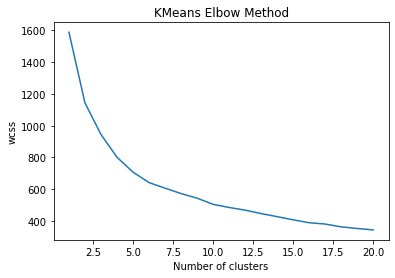

In [21]:
from matplotlib import pyplot as plt

wcss = []

for i in range(1,kmeans.n_clusters+1):
    km=KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(barrons_scaled)
    wcss.append(km.inertia_)
    print(i)
    
plt.plot(range(1,kmeans.n_clusters+1), wcss)
# check if we can enlarge size of figure
plt.figsize=(10, 12)
plt.title('KMeans Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [22]:
km=KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=0)
km.fit(barrons_scaled)

KMeans(n_clusters=6, random_state=0)

In [23]:
cluster_data_six = pd.DataFrame(columns = ['fg', 'ss', 'mtd', 'ytd'])

for i in range(km.n_clusters):
    fg = 0
    ss = 0 
    mtd = 0 
    ytd = 0 
    count = 0
    for j in range(len(barrons)):
        if km.labels_[j] == i:
            fg += barrons['Fundamental Grade'][j]
            ss += barrons['Sentiment Score'][j]
            mtd += barrons['MTD'][j]
            ytd += barrons['YTD'][j]
            count += 1
    print('Cluster #', i)
    print('Fundamental Grade Avg', '{:.2f}'.format(fg / count))
    print('Sentiment Score Avg', '{:.2f}'.format(ss / count))
    print('Month to Date Avg', '{:.2f}'.format(mtd / count))
    print('Year to Date Avg', '{:.2f}'.format(ytd / count))
    print('')
    cluster_data_six = cluster_data_six.append({'fg': fg / count, 'ss': ss / count, 'mtd': mtd / count, 'ytd': ytd / count}, ignore_index=True)

Cluster # 0
Fundamental Grade Avg 61.15
Sentiment Score Avg 7.57
Month to Date Avg 2.02
Year to Date Avg 12.93

Cluster # 1
Fundamental Grade Avg 77.18
Sentiment Score Avg 7.98
Month to Date Avg 6.14
Year to Date Avg 76.61

Cluster # 2
Fundamental Grade Avg 75.17
Sentiment Score Avg 8.36
Month to Date Avg 7.28
Year to Date Avg 28.67

Cluster # 3
Fundamental Grade Avg 72.46
Sentiment Score Avg 4.14
Month to Date Avg -4.56
Year to Date Avg 0.10

Cluster # 4
Fundamental Grade Avg 47.36
Sentiment Score Avg 4.05
Month to Date Avg -5.14
Year to Date Avg -6.39

Cluster # 5
Fundamental Grade Avg 75.54
Sentiment Score Avg 6.88
Month to Date Avg -4.93
Year to Date Avg 23.83



In [24]:
cluster_data_six

,fg,ss,mtd,ytd
0,61.149541,7.565138,2.021284,12.925138
1,77.179310,7.975862,6.137241,76.606207
2,75.168687,8.355556,7.276162,28.666768
3,72.455556,4.137037,-4.563704,0.103519
4,47.361905,4.047619,-5.140476,-6.388571
5,75.535294,6.877647,-4.933294,23.825647


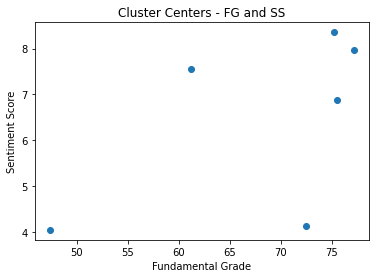

In [25]:
plt.scatter(cluster_data_six['fg'], cluster_data_six['ss'])
plt.title('Cluster Centers - FG and SS')
plt.xlabel('Fundamental Grade')
plt.ylabel('Sentiment Score')
plt.show()

In [26]:
for i in range(len(barrons)):
    if km.labels_[i] == 4:
        print(barrons['Ticker'][i], barrons['Company Name'][i])

W Wayfair, Inc. Class A
DLTR Dollar Tree, Inc.
BLL Ball Corporation
PTON Peloton Interactive, Inc.
CAG Conagra Brands, Inc.
FMC FMC Corporation
RPRX Royalty Pharma Plc Class 
GIS General Mills, Inc.
CLX Clorox Company
MKTX MarketAxess Holdings Inc.
BF.B Brown-Forman Corporation 
CTXS Citrix Systems, Inc.
PPL PPL Corporation
BAX Baxter International Inc.
UTHR United Therapeutics Corpo
AMRX Amneal Pharmaceuticals, I
INSW International Seaways, In
KSU Kansas City Southern
CCMP CMC Materials, Inc.
FF FutureFuel Corp.
VHC VirnetX Holding Corporati


In [27]:
for i in range(len(barrons)):
    if km.labels_[i] == 1:
        print(barrons['Ticker'][i], barrons['Company Name'][i])

FLGT Fulgent Genetics, Inc.
DKS Dick's Sporting Goods, In
GOOGL Alphabet Inc. Class A
HIBB Hibbett Inc
LGIH LGI Homes, Inc.
HZO MarineMax, Inc.
CROX Crocs, Inc.
ATKR Atkore Inc
TPX Tempur Sealy Internationa
AMAT Applied Materials, Inc.
XPEL XPEL, Inc.
CCS Century Communities, Inc.
SFBS ServisFirst Bancshares In
WAL Western Alliance Bancorp
ONEW OneWater Marine Inc Class
TBK Triumph Bancorp, Inc.
CLFD Clearfield, Inc.
CPRX Catalyst Pharmaceuticals,
WAT Waters Corporation
GNRC Generac Holdings Inc.
MCB Metropolitan Bank Holding
CUBI Customers Bancorp, Inc.
RVLV Revolve Group, Inc Class 
TBBK Bancorp Inc
CMBM Cambium Networks Corporat
AVNW Aviat Networks, Inc.
FTNT Fortinet, Inc.
CRL Charles River Laboratorie
IT Gartner, Inc.


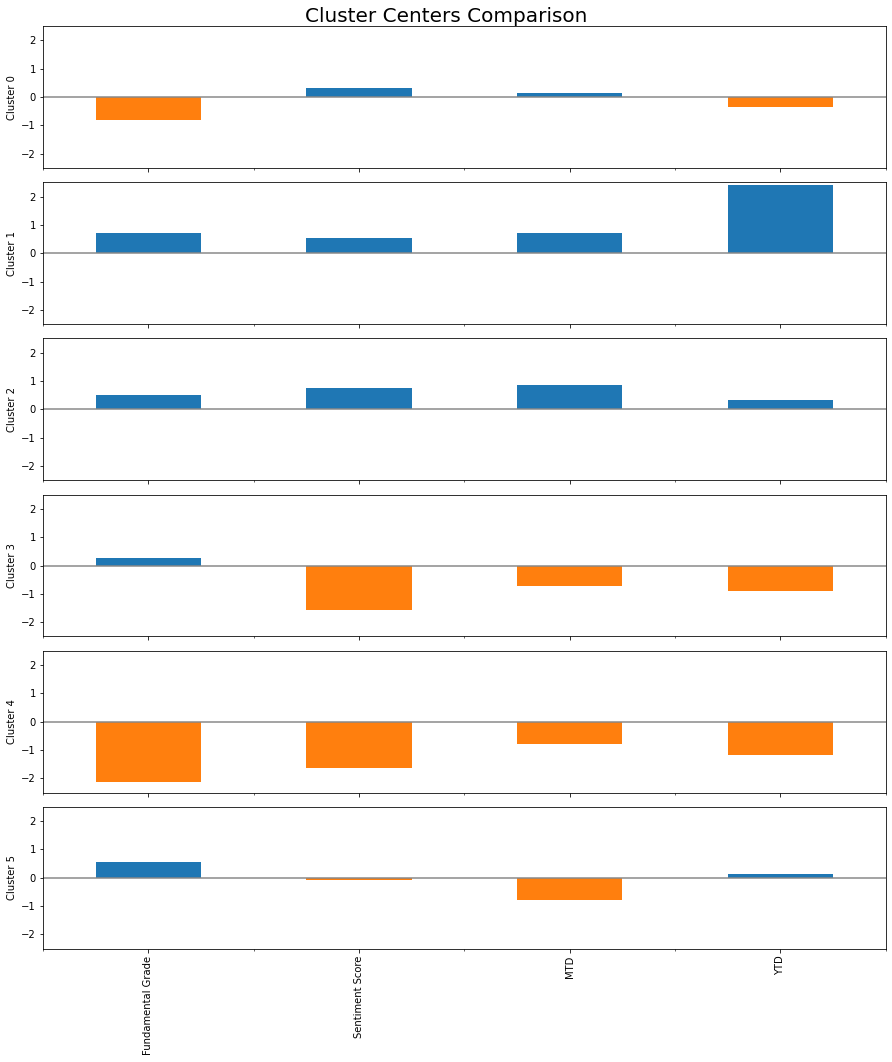

In [45]:
centers = pd.DataFrame(km.cluster_centers_, columns=barrons_cluster.columns)

f, axes = plt.subplots(km.n_clusters, 1, figsize=(12.5, 15), sharex=True)
f.suptitle('Cluster Centers Comparison', fontsize=20)
for i, ax in enumerate(axes):
    center = centers.loc[i, :]
#    maxPC = 1.01 * np.max(np.max(np.abs(center)))
    max_C = 2.5
    colors = ['C0' if l > 0 else 'C1' for l in center]
    ax.axhline(color='#888888')
    center.plot.bar(ax=ax, color=colors)
    ax.set_ylabel(f'Cluster {i}')
    ax.set_ylim(-max_C, max_C)

plt.tight_layout()
plt.show()